In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
#import seaborn as sns
import os

In [2]:
datadir = '/home/elizahoward/cmspix28-mc-sim/minbiasDataSet2/'

In [3]:
truth = pd.DataFrame()

for f in os.listdir(datadir):
    if ".parquet" in f and "label" in f:
        truth = pd.concat([truth,pd.read_parquet(datadir+f),])

In [10]:
truth.head()

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,PID,cotAlpha,cotBeta,y-midplane,x-midplane
0,-160.215591,9.277992,100.0,-2.095815,0.067528,0.585013,43926.0,-4.2750,0.58899,211.0,-3.582510,0.115430,3.506496,18.909916
1,-3.378223,-3.650641,100.0,-0.030787,0.108075,0.521725,8871.0,-5.1250,0.53280,-211.0,-0.059010,0.207149,-14.008109,-0.427722
2,-113.118065,-19.272051,100.0,-0.269820,-0.015707,0.253535,8279.0,3.9875,0.25412,-211.0,-1.064232,-0.061952,-16.174451,-59.906477
3,29.796810,-8.248226,100.0,1.442786,0.288815,1.553939,11345.0,-5.1500,1.58056,-211.0,0.928470,0.185860,-17.541223,-16.626698
4,238.226761,11.233417,100.0,1.723553,0.006867,0.299589,47551.0,1.1000,0.29985,-211.0,5.753058,0.022921,10.087347,-49.426157


In [11]:
max(truth['x-midplane'])

74.99954910706009

In [12]:
1.5*12.5

18.75

In [13]:
#df['x-entry'] + df['cotAlpha']*(sensor_thickness/2 - df['z-entry'])

-4.794500+ 0.048299/-0.503695*(50-100)

-3.1124986350938855e-05

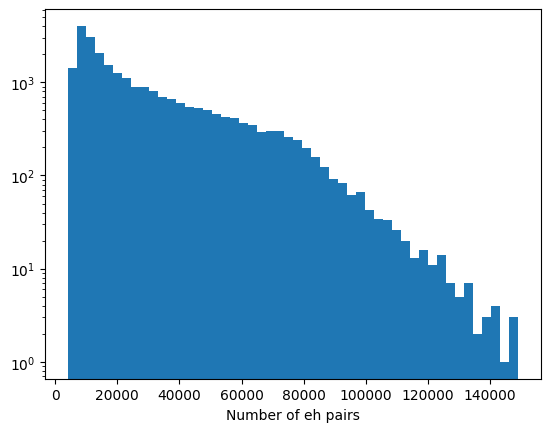

In [14]:
plt.hist(truth['number_eh_pairs'],bins=50);
plt.xlabel('Number of eh pairs')
plt.yscale('log')

Text(0, 0.5, 'Tracks')

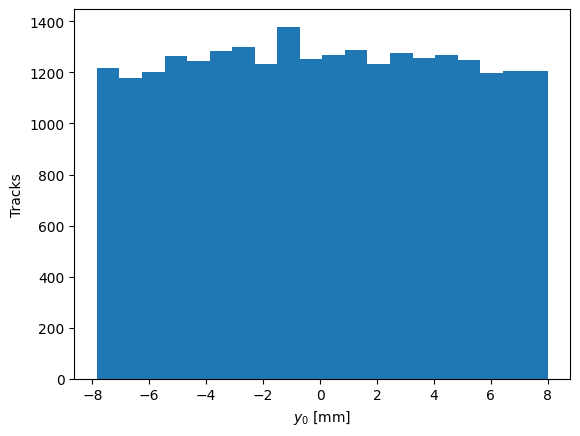

In [15]:
plt.hist(truth['y-local'],bins=20,histtype='stepfilled');
plt.xlabel(r'$y_0$ [mm]')
plt.ylabel('Tracks')

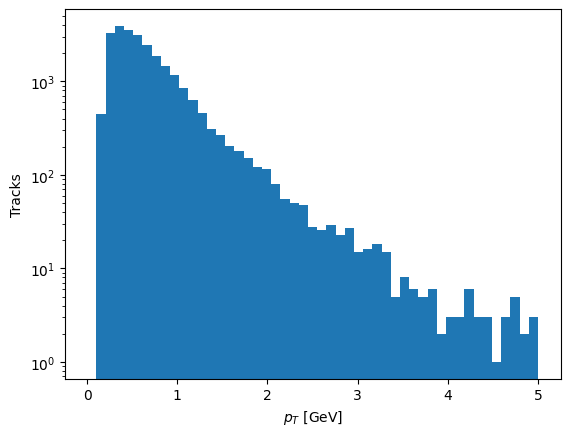

In [16]:
plt.hist(truth['pt'],bins=np.linspace(0,5,50),histtype='stepfilled');
plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel('Tracks')
plt.yscale('log')
#plt.plot([0.2,0.2],[0,5000000],color='black')
#plt.plot([0.5,0.5],[0,5000000],color='black',linestyle='--')
#plt.plot([1,1],[0,5000000],color='black',linestyle='--')
#plt.plot([2,2],[0,5000000],color='black',linestyle='--')
#plt.ylim(1000,2000000)

Text(0, 0.5, 'Tracks')

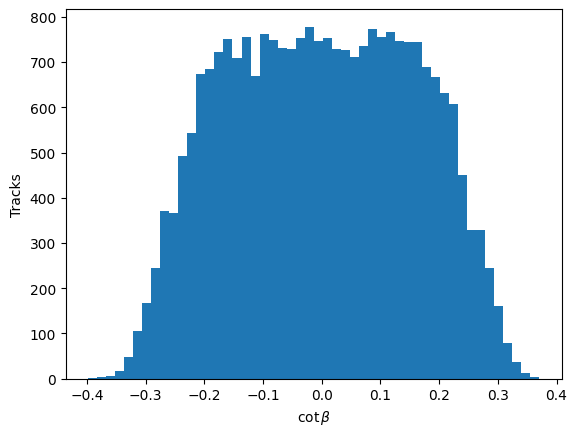

In [17]:
plt.hist(truth['cotBeta'],bins=50,histtype='stepfilled');
plt.xlabel(r'$\cot\beta$')
plt.ylabel('Tracks')
#plt.savefig('figures/cotBeta.pdf',bbox_inches='tight')

Text(0, 0.5, 'Tracks')

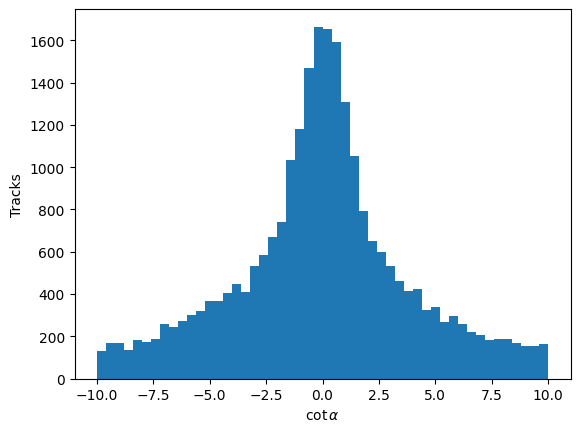

In [18]:
plt.hist(truth['cotAlpha'],bins=50,histtype='stepfilled');
plt.xlabel(r'$\cot\alpha$')
plt.ylabel('Tracks')
#plt.savefig('figures/cotAlpha.pdf',bbox_inches='tight')

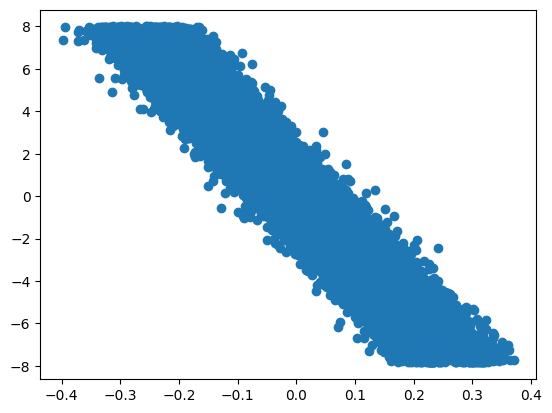

In [19]:
plt.scatter(truth['cotBeta'],truth['y-local'])

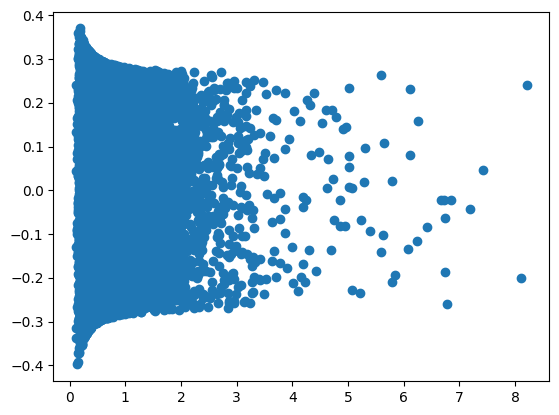

In [20]:
plt.scatter(truth['pt'],truth['cotBeta'])

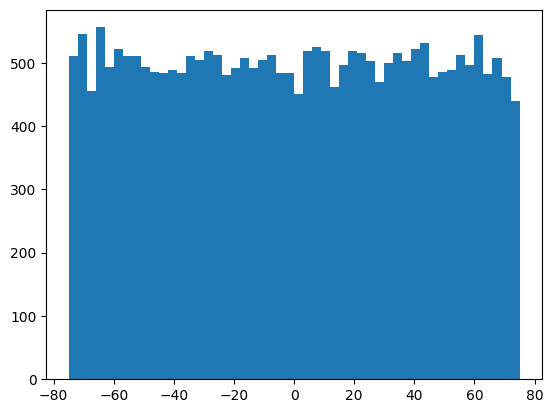

In [21]:
plt.hist(truth['x-midplane'],bins=50);

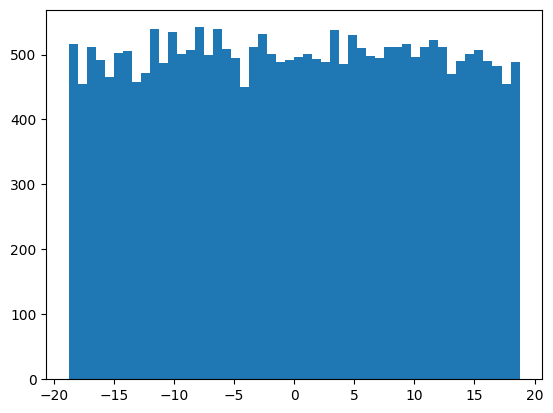

In [22]:
plt.hist(truth['y-midplane'],bins=50);

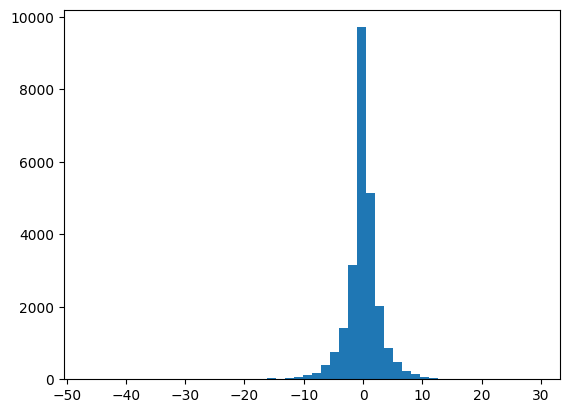

In [23]:
plt.hist(truth['n_x'],bins=50);

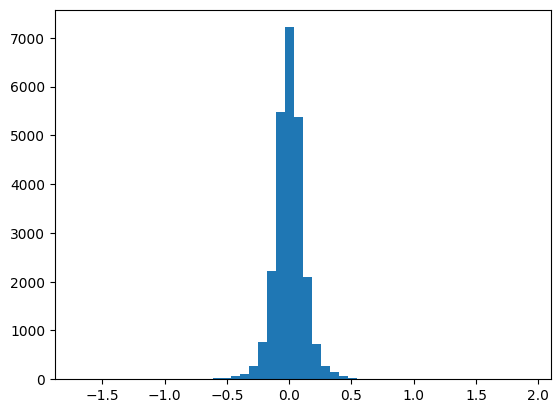

In [24]:
plt.hist(truth['n_y'],bins=50);

In [25]:
B = 3.8*(3*10**8) # eV/m
R = 0.029 # meters

def deltaPhi(pT,q):
    pT = pT*10**9 # eV
    return np.arcsin(q*R*B/(2*pT))

def cotBeta(pT,q,yloc):
    return 1./np.tan(np.pi/2 - deltaPhi(pT,q) - np.arctan(yloc/R))

def pT(cotBeta,q,yloc):
    dPhi = 1*np.arctan(1./cotBeta) - np.pi/2 + np.arctan(yloc/R)
    return q*R*B/(2*np.sin(dPhi))/(10**9) # eV

# Sanity check
pt = 4
pT(cotBeta(pt,1,.01),1,.01)

-3.9999999999999964

Text(0, 0.5, '$\\cot \\beta$')

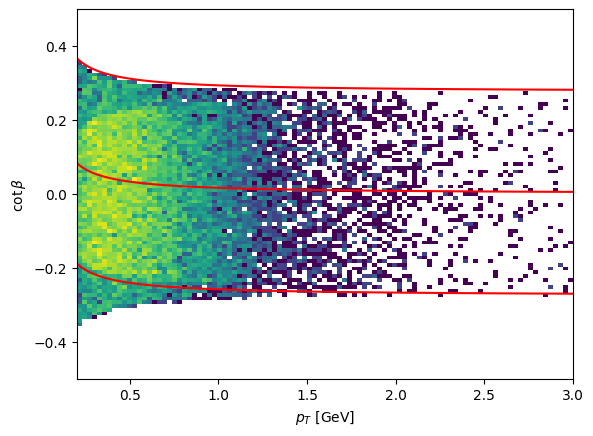

In [26]:
xmin = 0.2
xmax = 3

x = np.linspace(xmin,xmax,100)
y = np.linspace(-0.5,0.5,100)

fig, ax = plt.subplots(1,1)

plt.hist2d(truth['pt'],truth['cotBeta'],bins=[x,y],norm = matplotlib.colors.LogNorm());

y1 = cotBeta(x,1,0)
plt.plot(x,y1,label=r'center',color='red')

y2 = cotBeta(x,1,0.008)
plt.plot(x,y2,label=r'left edge',color='red')

y3 = cotBeta(x,1,-0.008)
plt.plot(x,y3,label=r'right edge',color='red')

xvals = [4, 5, 4]

#labelLines(ax.get_lines(), align=False, xvals=xvals, yoffsets=0.05, backgroundcolor="none")

plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel(r'$\cot \beta$')
#plt.savefig('figures/pTcotBeta.pdf')

In [27]:
def pix_grid():
    for i in range(0,22):
        x = 50*i-525
        plt.plot([x,x],[-100,100],color='lightgray',linewidth=0.5)
        
    for i in range(0,14):
        y = 12.5*i-81.25
        plt.plot([-550,550],[y,y],color='lightgray',linewidth=0.5)

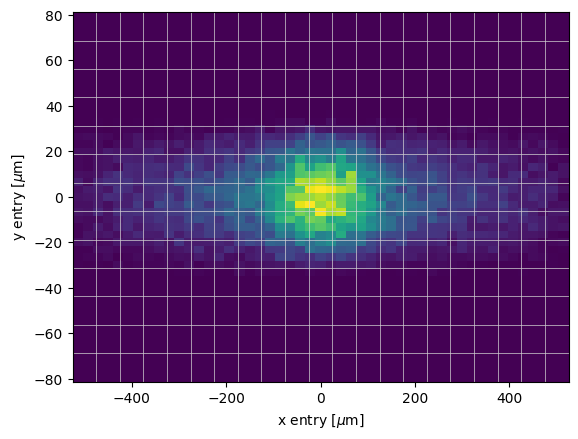

In [28]:
plt.hist2d(x=truth['x-entry'],y=truth['y-entry'],bins=[np.linspace(-525,525,50),np.linspace(-81.25,81.25,50)]);
plt.xlabel(r'x entry [$\mu$m]')
plt.ylabel(r'y entry [$\mu$m]')
pix_grid()
#plt.xlim(-525,525)
#plt.ylim(-81.25,81.25)

plt.savefig('/home/elizahoward/figures/numberofhitsMinbias.pdf')

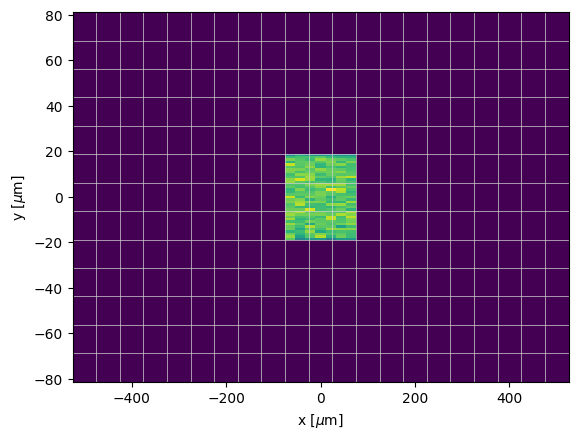

In [29]:
plt.hist2d(x=truth['x-midplane'],y=truth['y-midplane'],bins=[np.linspace(-525,525,50),np.linspace(-81.25,81.25,150)]);
plt.xlabel(r'x [$\mu$m]')
plt.ylabel(r'y [$\mu$m]')
pix_grid()
#plt.xlim(-525,525)
#plt.ylim(-81.25,81.25)

#plt.savefig('figures/xy.pdf')

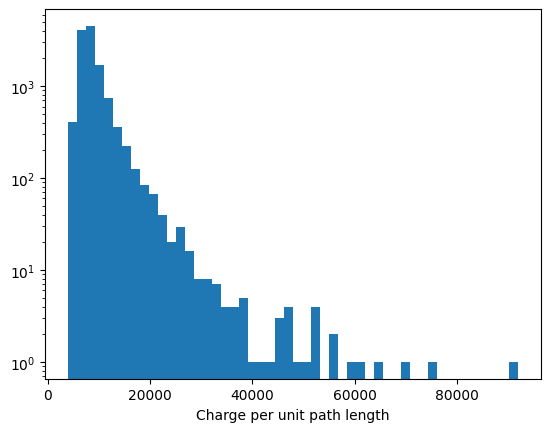

In [21]:
def charge_per_path(Q,cota,cotb):
    return Q/np.sqrt(1+cota*cota+cotb*cotb)

truth['charge_per_path'] = charge_per_path(truth['number_eh_pairs'],truth['cotAlpha'],truth['cotBeta'])

plt.hist(truth['charge_per_path'],bins=50)
plt.xlabel('Charge per unit path length')
plt.yscale('log')